<a href="https://colab.research.google.com/github/Tpavan2004/fml/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe

<bound method NDFrame.describe of      pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2    

In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [11]:
top_age = df.age.value_counts().head(15)
top_age

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
Name: age, dtype: int64

<Axes: title={'center': 'Top ages in diabates diagonised people'}, ylabel='age'>

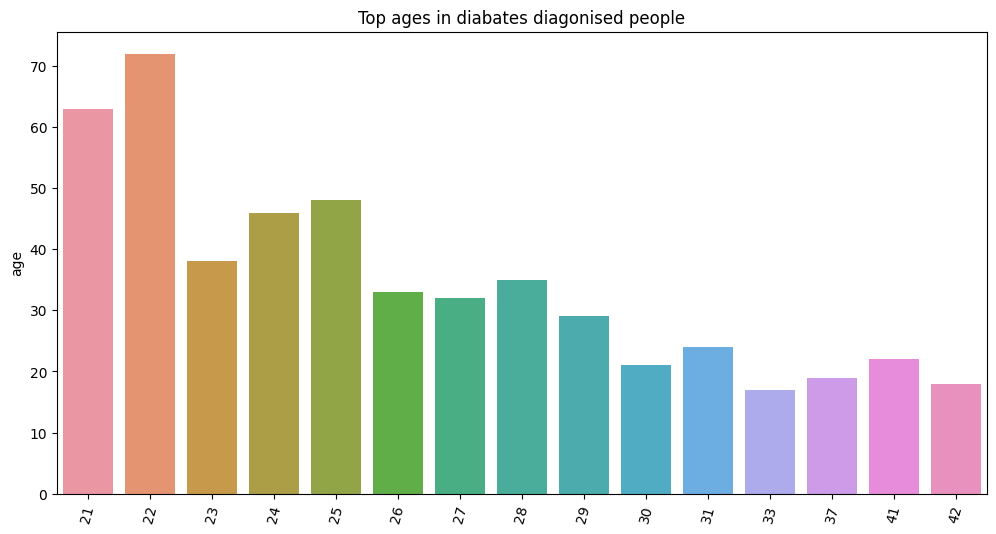

In [12]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top ages in diabates diagonised people')
sns.barplot(x=top_age.index, y=top_age)

(array([  0.,   1.,   3.,  12.,  70., 197., 245., 167.]),
 array([10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <BarContainer object of 8 artists>)

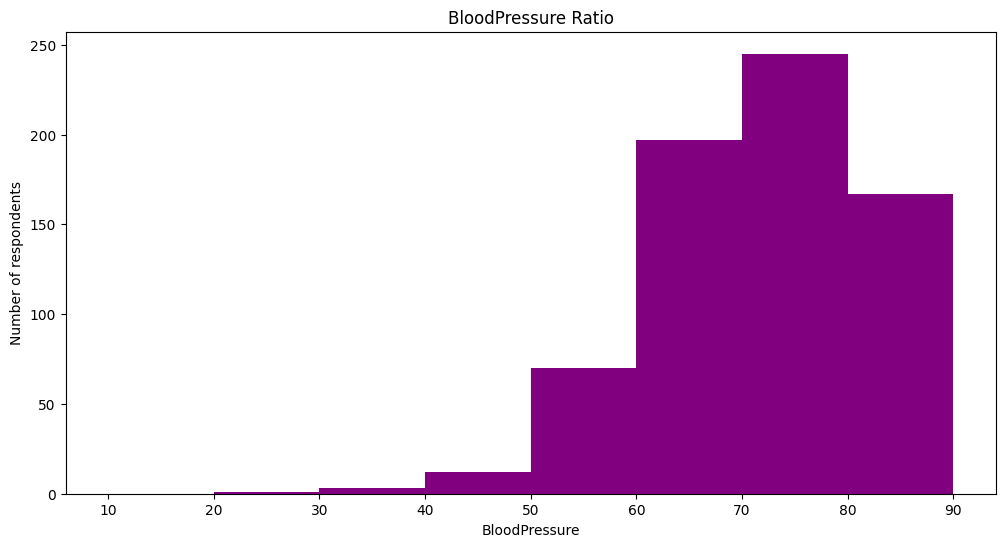

In [14]:
plt.figure(figsize=(12, 6))
plt.title("BloodPressure Ratio")
plt.xlabel('BloodPressure')
plt.ylabel('Number of respondents')

plt.hist(df.diastolic, bins=np.arange(10,100,10), color='purple')

In [28]:
outcome_counts = df.diabetes.value_counts()
outcome_counts

0    500
1    268
Name: diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x7f97822b5b40>,
 [Text(0.5025943242672994, -0.9784676515931924, '0'),
  Text(-0.5025944158780501, 0.9784676045369114, '1')],
 [Text(0.2741423586912542, -0.5337096281417413, '65.1%'),
  Text(-0.27414240866075457, 0.5337096024746789, '34.9%')])

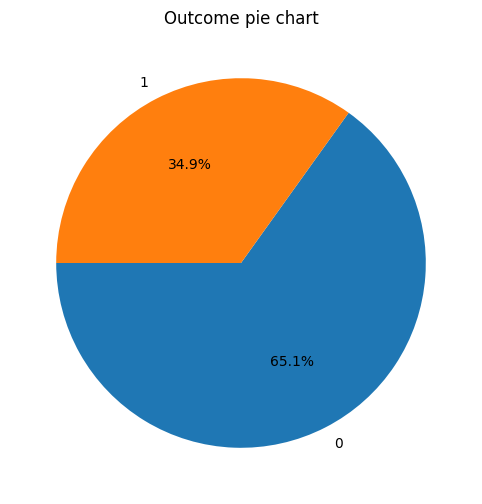

In [29]:
plt.figure(figsize=(12,6))
plt.title('Outcome pie chart')
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=180)

In [16]:
#feature variables
x=df.drop(['diabetes'], axis=1)
x

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
#target variable
y=df.diabetes
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25,random_state=7)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn import metrics

In [34]:
dtc=DecisionTreeClassifier()

In [35]:
dtc=dtc.fit(xtrain,ytrain)

In [36]:
pred1=dtc.predict(xtest)

In [37]:
pred1

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [38]:
print("Accuracy:",metrics.accuracy_score(ytest, pred1))
print("Precision:",metrics.precision_score(ytest, pred1))
print("Recall:",metrics.recall_score(ytest, pred1))

Accuracy: 0.7552083333333334
Precision: 0.6666666666666666
Recall: 0.6571428571428571


Text(0.5, 427.9555555555555, 'Predicted label')

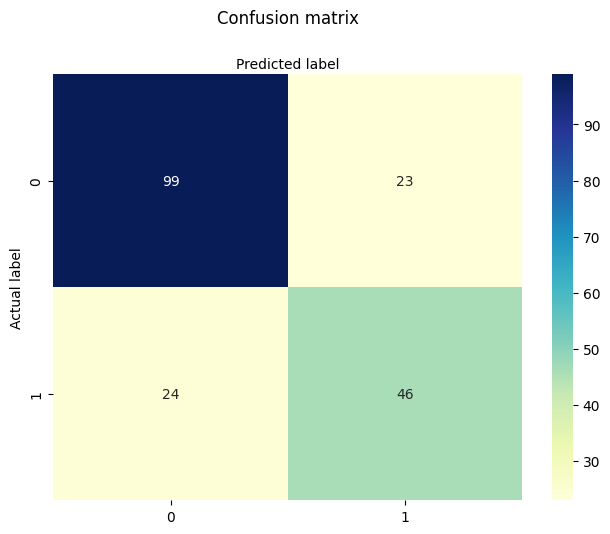

In [39]:
cnf_matrix = metrics.confusion_matrix(ytest, pred1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')